## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import glob
import os

## Loading the Data

The GTSRB dataset contains around 50,000 color images in 43 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
def readTrafficSigns(rootpath):
    images = []
    labels = []
    
    for c in range(43):
        prefix = rootpath + '/' + format(c, '05d') + '/'
        gtFile = open(prefix + 'GT-' + format(c,'05d') + '.csv')
        print(gtFile)
        gtReader = csv.reader(gtFile,delimiter=';')
        print("Headers: ", gtReader.__next__())
        
        for row in gtReader:
            images.append(plt.imread(prefix + row[0]))
            labels.append(row[7])
        
        gtFile.close()
        
    return images,labels

In [3]:
# Download class names
# wget "https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv" -outfile "signnames.csv"
classes = pd.read_csv('signnames.csv')
class_names = {}
for i, row in classes.iterrows():
    class_names[str(row[0])] = row[1]

In [4]:
class_names

{'0': 'Speed limit (20km/h)',
 '1': 'Speed limit (30km/h)',
 '2': 'Speed limit (50km/h)',
 '3': 'Speed limit (60km/h)',
 '4': 'Speed limit (70km/h)',
 '5': 'Speed limit (80km/h)',
 '6': 'End of speed limit (80km/h)',
 '7': 'Speed limit (100km/h)',
 '8': 'Speed limit (120km/h)',
 '9': 'No passing',
 '10': 'No passing for vehicles over 3.5 metric tons',
 '11': 'Right-of-way at the next intersection',
 '12': 'Priority road',
 '13': 'Yield',
 '14': 'Stop',
 '15': 'No vechiles',
 '16': 'Vehicles over 3.5 metric tons prohibited',
 '17': 'No entry',
 '18': 'General caution',
 '19': 'Dangerous curve to the left',
 '20': 'Dangerous curve to the right',
 '21': 'Double curve',
 '22': 'Bumpy road',
 '23': 'Slippery road',
 '24': 'Road narrows on the right',
 '25': 'Road work',
 '26': 'Traffic signals',
 '27': 'Pedestrians',
 '28': 'Children crossing',
 '29': 'Bicycles crossing',
 '30': 'Beware of ice/snow',
 '31': 'Wild animals crossing',
 '32': 'End of all speed and passing limits',
 '33': 'Turn 

In [20]:
train_path=".\GTSRB_Training\Final_Training\Images"
trainImages, trainLabels = readTrafficSigns(train_path)

<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00000/GT-00000.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00001/GT-00001.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00002/GT-00002.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00003/GT-00003.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId']
<_io.TextIOWrapper name='.\\GTSRB_Training\\Final_Training\\Images/00004/GT-00004.csv' mode='r' encoding='cp1252'>
Headers:  ['Filename', 'Width', 'Height', 'Roi.X1', '

In [6]:
len(trainImages)

39209

In [7]:
np.unique(trainLabels)

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '5', '6', '7', '8', '9'], dtype='<U2')

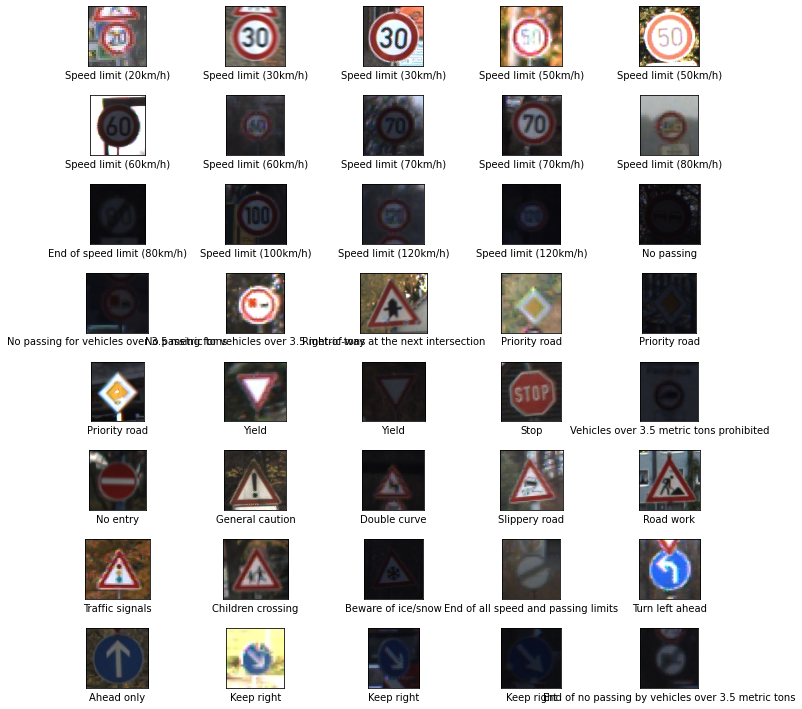

In [8]:
plot = 1
plt.figure(figsize=(10,10))
for i in range(0,39209,1000):
    plt.subplot(8,5,plot)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainLabels[i]])
    plot += 1
plt.show()

In [9]:
from collections import Counter

label_counts = Counter(trainLabels).most_common()
for l, c in label_counts:
    print(c, '\t', l ,'\t', class_names[l])

2250 	 2 	 Speed limit (50km/h)
2220 	 1 	 Speed limit (30km/h)
2160 	 13 	 Yield
2100 	 12 	 Priority road
2070 	 38 	 Keep right
2010 	 10 	 No passing for vehicles over 3.5 metric tons
1980 	 4 	 Speed limit (70km/h)
1860 	 5 	 Speed limit (80km/h)
1500 	 25 	 Road work
1470 	 9 	 No passing
1440 	 7 	 Speed limit (100km/h)
1410 	 3 	 Speed limit (60km/h)
1410 	 8 	 Speed limit (120km/h)
1320 	 11 	 Right-of-way at the next intersection
1200 	 18 	 General caution
1200 	 35 	 Ahead only
1110 	 17 	 No entry
780 	 14 	 Stop
780 	 31 	 Wild animals crossing
689 	 33 	 Turn right ahead
630 	 15 	 No vechiles
600 	 26 	 Traffic signals
540 	 28 	 Children crossing
510 	 23 	 Slippery road
450 	 30 	 Beware of ice/snow
420 	 6 	 End of speed limit (80km/h)
420 	 16 	 Vehicles over 3.5 metric tons prohibited
420 	 34 	 Turn left ahead
390 	 22 	 Bumpy road
390 	 36 	 Go straight or right
360 	 20 	 Dangerous curve to the right
360 	 40 	 Roundabout mandatory
330 	 21 	 Double curve
300 	 

## Preprocessing Images

We first import the tensorflow library to use some of it's suite of helper functions to resize and standardize the image data.

In [10]:
import tensorflow as tf

In [21]:
minsize = (100,100,3)
for i in [t.shape for t in trainImages]:
    if i[0] < minsize[0] or i[1] < minsize[1]:
        print(i)
        minsize = i
        
print(minsize)

(30, 29, 3)
(29, 30, 3)
(26, 27, 3)
(26, 25, 3)
(25, 26, 3)
(27, 25, 3)
(25, 26, 3)
(25, 25, 3)
(25, 25, 3)


In [22]:
# trainImages = np.array(trainImages)
trainImages = tf.convert_to_tensor(trainImages, dtype=tf.float32)

ValueError: Can't convert non-rectangular Python sequence to Tensor.

In [ ]:
#scale model
trainImages = trainImages / 255.0

In [ ]:
size = (28, 28)

trainImages = trainImages.map(lambda x: tf.image.resize(x, size))

## Baseline CNN Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.GaussianNoise(0.5))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))